# Working our way up to web scraping

There's been some interest in web scraping.  It's beyond us, but there are some things we can do.  ...

**Note: requires internet access to run.**  

This IPython notebook was created by Dave Backus, Chase Coleman, and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

<a id=prelims></a>

## Preliminaries 

Import packages, etc.  

In [1]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import sys                      # system module, used to get Python version 
import os                       # operating system tools (check files)
import datetime as dt           # date tools, used to note current date  

# these are new 
import requests, io             # internet and input tools  
from bs4 import BeautifulSoup   # website parsing

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())


Python version:  3.5.1 |Anaconda custom (64-bit)| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version:  0.18.0
Requests version:  2.9.1
Today's date: 2016-05-04


<a id=lucky></a>

## Sometimes we get lucky

We sometimes find that we can access data straight from a web page with Pandas' `read_html`.  It works just like `read_csv` or `read_excel`.  

The first example is [baseball-reference.com](http://www.baseball-reference.com/).  The same people run similar sites for football and basketball.  Many of their pages are collections of tables.  See, for example, [this one](http://www.baseball-reference.com/players/m/mccutan01.shtml) for Pittsburgh's Andrew McCucthen.    

In [2]:
# baseball reference
url = 'http://www.baseball-reference.com/players/m/mccutan01.shtml'
am  = pd.read_html(url)

print('Ouput has type', type(am), 'and length', len(am))
print('First element has type', type(am[0]))

Ouput has type <class 'list'> and length 10
First element has type <class 'pandas.core.frame.DataFrame'>


**Question.** What do we have here?  A list of length 10?  Whose elements are dataframes?  Evidently this reads in all the tables from the page into dataframes and collects them in a list.  

In [3]:
am[4].head()

,Year,Tm,Lg,Age,Pos,G,GS,CG,Inn,Ch,...,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,2009.0,PIT,NL,22,CF,108,108.0,106.0,952.2,275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,PIT,NL,22,OF,108,108.0,106.0,952.2,275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.0,PIT,NL,23,CF,152,152.0,140.0,1290.1,386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.0,PIT,NL,23,OF,152,152.0,140.0,1290.1,386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011.0,PIT,NL,24,CF,155,153.0,146.0,1353.2,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scanning url's

It is important to think about what you are doing when you get data from online. It turns out to be useful to think about how you can specify the type of information that you want from a website. This is done through a site's API.

We will talk about two examples:  

* Yahoo Finance data (Itamar's suggestion)
* Government Open data (through Socrata Open Data API SODA)

One important point. Arguments to a url are passed after a `?` and multiple arguments are separated using `&`. You will see what we mean below.

### Yahoo Finance

One place to get an idea of how the Yahoo Finance api works is to start at the link below

http://www.jarloo.com/yahoo_finance/

Itamar's comments on Yahoo finance.  

Adapt this from Itamar 

#%%%

This code shows an example of a simple web scrapping program.
Walk through the following steps before running the code:

1) Go to : http://finance.yahoo.com/q/hp?s=AAPL+Historical+Prices

2) Enter the dates you want and hit the get prices button.

3) Once the results are shown, look on the url address.

4) The new url will include several parameters, each one is seperated by the & character.

5) Try to explore the meanning of each parameter (s, a,b,c,d,e,f and g)

6) After some trial and error you can realize that each parameter represents the data you entered as input: the day, month and year, the stock sybmol, and the frequency  you chose (daily, weekly etc)

7) Scroll down to the bottom of the page. there is a link which allows downloading the data as a csv file. click on it

8) Open the CSV in excel and see the structure of the file.

9) Go back to the web page, instead of clicking on the csv link, right click on it and copy the link address

10) Paste the address in a notebook - This is the url link we can use to access the data from our coding environment.


http://real-chart.finance.yahoo.com/table.csv?s=AAPL&a=00&b=01&c=2010&d=11&e=31&f=2014&g=d&ignore=.csv


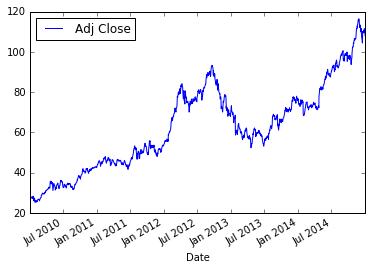

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

symbol='AAPL'  ## change this to any stock symbol you'd like to get
begin_day='01'
begin_month='00' # January (note the months run from 0 to 11)
begin_year='2010'
end_day = '31'
end_month = '11' #December
end_year='2014'
freq='d' #d - daily, w - weekly, m - monthly etc..
# the following three lines will construct a url based on the parameters above:
url = 'http://real-chart.finance.yahoo.com/table.csv?s='+symbol
url+= '&a='+begin_month+'&b='+begin_day+'&c='+begin_year
url+= '&d='+end_month+'&e='+end_day+'&f='+end_year+'&g='+freq+'&ignore=.csv'

print (url)   ## This should show a simliar stucture to the csv file found before.

# pandas allows us to read the csv file dirctly from the url
df=pd.read_csv(url)
# since all the data is read as a string, it'll be good to convert the date column to a datetime type
df['Date']=pd.to_datetime(df['Date'])
# now we can, for exmaple, plot the Adj.Close column vs. the date:
df.plot(x='Date',y='Adj Close')

### SODA API

https://dev.socrata.com/consumers/examples/pandas-and-jupyter-notebook.html

https://dev.socrata.com/docs/queries/

Now that we've talked about this, let's look at a dataset and try some things.

In [37]:
base_url_json = "https://www.opendata.go.ke/resource/p452-xb7c.json"

df_json = pd.read_json(base_url_json)
df_json.head(3)

,boys_toilets,costituency,county,district,division,geolocation,girls_toilets,gok_tsc_female,gok_tsc_male,level_of_education,...,school_institution_type_2,school_institution_type_3,sponsor_of_school,status_of_school,teachers_toilets,total_boys,total_enrolment,total_girls,total_number_of_classrooms,total_toilets
0,0,MSAMBWENI,KWALE,KWALE,MSAMBWENI,"{'latitude': '-4.248295', 'longitude': '39.085...",0,0,0,PRIMARY SCHOOL,...,DAY ONLY,ORDINARY,CENTRAL GOVERNMENT/DEB,PUBLIC,0,0,839,0,1,0
1,4,KISAUNI,MOMBASA,MOMBASA,KISAUNI,"{'latitude': '-3.99606', 'longitude': '39.6977...",4,0,0,PRIMARY SCHOOL,...,DAY ONLY,ORDINARY,RELIGIOUS ORGANIZATION,PUBLIC,2,0,736,0,15,0
2,5,WEBUYE,BUNGOMA,BUNGOMA,CHWELE,"{'latitude': '0.71988', 'longitude': '34.62895...",6,0,1,PRIMARY SCHOOL,...,DAY ONLY,ORDINARY,RELIGIOUS ORGANIZATION,PUBLIC,2,0,624,0,15,0


In [38]:
base_url_csv = "https://www.opendata.go.ke/resource/p452-xb7c.csv"

df_csv = pd.read_csv(base_url_csv)
df_csv.columns = df_csv.columns.str.replace(" ", "_").str.lower()
df_csv.head(3)

,name_of_school,level_of_education,status_of_school,sponsor_of_school,school_institution_type_1,school_institution_type_2,school_institution_type_3,pupil_teacher_ratio,pupil_classroom_ratio,pupil_toilet_ratio,...,non-teaching_staff_male,non-teaching_staff_female,province,county,district,division,location,costituency,geolocation,kodi_county
0,MTUMWA PRY SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,839.0,839.0,0.0,...,0,0,COAST,KWALE,KWALE,MSAMBWENI,MWERENI,MSAMBWENI,"(-4.248295, 39.085658)",NaN
1,KIEMBENI BAPTIST PRI SCH,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,736.0,49.1,92.0,...,1,0,COAST,MOMBASA,MOMBASA,KISAUNI,BAMBURI,KISAUNI,"(-3.99606, 39.6977)",NaN
2,MADISI ERSF PRI SCH,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,624.0,41.6,56.7,...,2,0,WESTERN,BUNGOMA,BUNGOMA,CHWELE,CHWELE,WEBUYE,"(0.71988, 34.62895)",NaN


Notice that we can choose to interact with either the json or the csv file. They both give us lots of columns (and not very many rows) though and we might want to choose a smaller set of the data. We will show that we can do this using the api described in the second link

In [39]:
df_json.columns

Index(['boys_toilets', 'costituency', 'county', 'district', 'division',
       'geolocation', 'girls_toilets', 'gok_tsc_female', 'gok_tsc_male',
       'level_of_education', 'local_authority_female', 'local_authority_male',
       'location', 'name_of_school', 'non_teaching_staff_female',
       'non_teaching_staff_male', 'others_female', 'others_male', 'province',
       'pta_bog_female', 'pta_bog_male', 'pupil_classroom_ratio',
       'pupil_teacher_ratio', 'pupil_toilet_ratio',
       'school_institution_type_1', 'school_institution_type_2',
       'school_institution_type_3', 'sponsor_of_school', 'status_of_school',
       'teachers_toilets', 'total_boys', 'total_enrolment', 'total_girls',
       'total_number_of_classrooms', 'total_toilets'],
      dtype='object')

In [40]:
# First lets select subset of data
base_url_json += "?$select=boys_toilets,girls_toilets,geolocation,name_of_school,level_of_education"

df_json2 = pd.read_json(base_url_json)
df_json2.head()

,boys_toilets,geolocation,girls_toilets,level_of_education,name_of_school
0,1,"{'latitude': '-1.66668', 'longitude': '38.3213...",2,PRIMARY SCHOOL,VOO SPECIAL UNIT
1,3,"{'latitude': '-1.012145', 'longitude': '35.648...",3,PRIMARY SCHOOL,MASAANTARE PRI
2,1,"{'latitude': '-1.159798', 'longitude': '34.394...",1,PRIMARY SCHOOL,NGOCHONI PRY SCH
3,1,"{'latitude': '-0.99747', 'longitude': '36.9308...",2,PRIMARY SCHOOL,NEEMA JUNIOR ACADEMY
4,0,"{'latitude': '-0.42783', 'longitude': '34.9299...",0,PRIMARY SCHOOL,LWANDA PRI SCH


In [42]:
# Now let's raise the number of observations
base_url_json += "&$limit=5000"

df_json3 = pd.read_json(base_url_json)

In [43]:
df_json.shape

(1000, 35)

In [44]:
df_json2.shape

(1000, 5)

In [45]:
df_json3.shape

(5000, 5)

## Accessing web pages 

Requests again...  

In [11]:
url = 'http://databootcamp.nyuecon.com/'
db = requests.get(url) 

In [12]:
db.headers

{'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Served-By': 'cache-atl6221-ATL', 'Content-Encoding': 'gzip', 'X-GitHub-Request-Id': '17EB272F:6097:AC5FE9E:5728AC98', 'Age': '0', 'X-Fastly-Request-ID': '36d43806a17806b9c71a3b60879628e0c848c1fe', 'Last-Modified': 'Thu, 21 Apr 2016 23:57:03 GMT', 'Vary': 'Accept-Encoding', 'Expires': 'Tue, 03 May 2016 14:00:17 GMT', 'Via': '1.1 varnish', 'Content-Length': '3499', 'Accept-Ranges': 'bytes', 'Server': 'GitHub.com', 'Content-Type': 'text/html; charset=utf-8', 'Cache-Control': 'max-age=600', 'Access-Control-Allow-Origin': '*', 'Connection': 'keep-alive', 'Date': 'Tue, 03 May 2016 18:47:14 GMT'}

In [13]:
db.url

'http://databootcamp.nyuecon.com/'

In [14]:
db.status_code

200

## Extracting pieces of web pages 

Use Beautiful Soup...  



In [15]:
bs = BeautifulSoup(db.content, 'lxml')

print('Type and length:  ', type(bs), ', ', len(bs), sep='')
print('Title: ', bs.title)
print('First n characters:\n', bs.prettify()[0:250], sep='')

Type and length:  <class 'bs4.BeautifulSoup'>, 7
Title:  <title>Data Bootcamp </title>
First n characters:
<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]> <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js"


In [39]:
bs.head

<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<title>Data Bootcamp </title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<meta content="Data Bootcamp " property="og:title"/>
<meta content="Data Bootcamp" property="og:site_name"/>
<meta content="http://databootcamp.nyuecon.com/" property="og:url"/>
<meta content="en-us" property="og:locale"/>
<meta content="website" property="og:type"/>
<link href="http://databootcamp.nyuecon.com/index.xml" rel="alternate" title="Data Bootcamp" type="application/rss+xml"/>
<link href="http://databootcamp.nyuecon.com/" rel="canonical"/>
<link href="http://databootcamp.nyuecon.com/touch-icon-144-precomposed.png" rel="apple-touch-icon-precomposed" sizes="144x144"/>
<link href="http://da

In [16]:
bs.title

<title>Data Bootcamp </title>

In [17]:
bs.find_all('a')

[<a class="baselink" href="http://databootcamp.nyuecon.com/">
   Data Bootcamp
 
 </a>,
 <a class="homelink" href="http://databootcamp.nyuecon.com/">Home</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_faq">Description &amp; FAQ</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_outline">Topic outlines &amp; links</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_duedates_ug">Due dates (UG)</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_duedates_mba">Due dates (MBA)</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_data">Data sources</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_team">Our team</a>,
 <a href="http://databootcamp.nyuecon.com/bootcamp_faq">FAQ</a>,
 <a href="https://github.com/DaveBackus/Data_Bootcamp/blob/master/Documents/bootcamp_syllabus.pdf">Syllabus</a>,
 <a href="https://www.gitbook.com/book/davebackus/test/details">Book</a>,
 <a href="https://github.com/DaveBackus/Data_Bootcamp/blob/master/Documents/bootcamp_project.pdf">

<bound method Tag.decode_contents of <!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js"> <!--<![endif]-->
<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<title>Data Bootcamp </title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<meta content="Data Bootcamp " property="og:title"/>
<meta content="Data Bootcamp" property="og:site_name"/>
<meta content="http://databootcamp.nyuecon.com/" property="og:url"/>
<meta content="en-us" property="og:locale"/>
<meta content="website" property="og:type"/>
<link href="http://databootcamp.ny